<a href="https://colab.research.google.com/github/shahrzadko/NLPDigitalMusic/blob/main/Digital_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data exploration & pre-processing

### Importing requested libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import nltk
import spacy
import string
import re
import warnings

from nltk.corpus import stopwords
from nltk.collocations import *
from collections import Counter
from nltk.stem import porter
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('genesis')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))
stemmer = porter.PorterStemmer()

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Importing the dataset

In [5]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/shahrzadko/NLPDigitalMusic/main/Digital_Music_5.json?token=GHSAT0AAAAAAB6LOL42SKHPCCMIVYPOC4REY7AKE2Q'
df = pd.read_json(url)
full_df = pd.DataFrame.from_records(df['data'])
full_df.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,{'Format:': ' Audio CD'},Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600,NaN
1,5.0,NaN,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,{'Format:': ' Audio CD'},Ad,bien,Five Stars,1412985600,NaN
2,5.0,NaN,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,{'Format:': ' Audio CD'},JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800,NaN
3,4.0,3,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,{'Format:': ' Audio CD'},john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400,NaN
4,5.0,NaN,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,{'Format:': ' Audio CD'},melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600,NaN
5,4.0,NaN,True,"11 19, 2015",A6JP9YYJCK3WO,5557706259,{'Format:': ' Audio CD'},Sylvia Arrowood,Enjoy Casting Crowns and their songs,Four Stars,1447891200,NaN
6,5.0,NaN,True,"06 6, 2015",A20Z0JD766DPG6,5557706259,{'Format:': ' Audio CD'},M Holley,Another very inspirational collection by a Ver...,Can't say enough. Great Christian music. God...,1433548800,NaN
7,5.0,NaN,False,"12 9, 2008",AXQ89O6YRT7AX,5557706259,{'Format:': ' MP3 Music'},PacificHype,"I love the song Slow Fade by Casting Crowns, e...",DEFINITELY DESERVES PERFECT STARS!!!!,1228780800,NaN
8,5.0,NaN,False,"10 7, 2008",A1M379MK8MKGUF,5557706259,{'Format:': ' MP3 Music'},Sergio,This is an awesome album from the amazing Chri...,Can't go wrong with Casting Crowns,1223337600,NaN
9,5.0,NaN,False,"09 3, 2008",AA762OWLWCPQ2,5557706259,{'Format:': ' Audio CD'},Daniel T. Hughes,I can't believe I haven't written a review for...,"Great music, but even better if you see them l...",1220400000,NaN


## Preprocessing

In [13]:
#Getting the reviews from the dataset
reviews = [str(review) for review in full_df.reviewText.values]
sample = reviews[:10000] #To reduce the runtime

In [14]:
#Tokenisation
tokens = [[token.text for token in nlp(sentence)] for sentence in sample]

#Lemmatization
lemmas = [[token.lemma_ if token.lemma_ != "-PRON-" else token.lower_ for token in nlp(sentence)] for sentence in sample]

#Stemming
stems = [[stemmer.stem(token) for token in sentence] for sentence in tokens]

#Getting pos
pos = [nltk.pos_tag(token) for token in tokens]

#Getting entities
entities = [[[ent.text, ent.label_] for ent in nlp(sentence).ents] for sentence in sample] 

In [15]:
#Taking the stems or the lemmas 
ptext = [' '.join(word) for word in lemmas]

#Converting to lowercase
ptext = [review.lower() for review in ptext]

#Removing numbers
ptext = [re.sub(r'\d+', '', review) for review in ptext]

#Removing punctuation
ptext = [re.sub(r'[^\w\s]',' ',review) for review in ptext]
ptext = [re.sub(' +', ' ', review) for review in ptext]
ptext = [re.sub('_', '', review) for review in ptext]

#Removing leading and trailing whitespaces
ptext = [review.strip() for review in ptext]

#Removing stopwords
ptext = [' '.join([word for word in review.split() if word not in stop_words]) for review in ptext]

In [19]:
frame = {'Original': sample, 
        'After Proprocessing': ptext}

pd.DataFrame.from_dict(frame)

,Original,After Proprocessing
0,"This is awesome to listen to, A must-have for ...",awesome listen must slayer fan sadly need trip...
1,bien,bien
2,It was great to hear the old stuff again and I...,great hear old stuff like new stuff recommend ...
3,well best of's are a bit poison normally but t...,well good bit poison normally bad pretty good ...
4,What can I say? This is Casting Crowns!!!This ...,say cast crowns good blessing fill cd
...,...,...
9995,Good soud.,good soud
9996,love me some Tom Petty,love tom petty
9997,cool song..,cool song
9998,This song reminds me of kicking back driving d...,song remind kick back drive uncongested freewa...


In [21]:
#Number of words
print('Number of words:')

bef = len(re.findall(r'\w+', ' '.join(sample)))
aft = len(re.findall(r'\w+', ' '.join(ptext)))

print('- Before preprocessing: ', bef )
print('- After preprocessing: ', aft )
print()

#Average review length
print('Average review length:')

bef_a = bef/10000
aft_a = aft/10000

print('- Before preprocessing: ', bef_a )
print('- After preprocessing: ', aft_a )
print()

#Punctuation
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
punct_b = 0
for i in sample:
    punct_b += count(i,set(string.punctuation))
punct_a = 0
for i in ptext:
    punct_a += count(i,set(string.punctuation))
    
print('Number of punctuation character:')
print('- Before preprocessing: ', punct_b)
print('- After preprocessing: ', punct_a)
print()


Number of words:
- Before preprocessing:  326755
- After preprocessing:  161490

Average review length:
- Before preprocessing:  32.6755
- After preprocessing:  16.149

Number of punctuation character:
- Before preprocessing:  62639
- After preprocessing:  0



## Data exploration

In [25]:
#Number of reviews
print('- Number of reviews:', len(full_df))

#Number of different products reviewed
print('- Number of different products reviewed: ', len(full_df.asin.unique()))

#Number of people who reviewed
print('- Number of people who reviewed: ', len(full_df.reviewerID.unique()))

#Reviews range and average
print('- max rating: ', full_df.overall.max())
print('- min rating: ', full_df.overall.min())
print('- avg rating: ', full_df.overall.mean())

#Time range
start = pd.to_datetime(full_df['unixReviewTime'],unit='s').min().date()
end = pd.to_datetime(full_df['unixReviewTime'],unit='s').max().date()

print('- First review: ', start)
print('- Last review: ', end)

# average length
print('- average review length (words): ', len(re.findall(r'\w+', ' '.join(sample)))/len(sample))

- Number of reviews: 169781
- Number of different products reviewed:  11797
- Number of people who reviewed:  16566
- max rating:  5.0
- min rating:  1.0
- avg rating:  4.700019436803883
- First review:  1998-07-09
- Last review:  2018-09-26
- average review length (words):  32.6755


In [23]:
#Most common people
people = [person[0] for person in [item for sublist in entities for item in sublist if item[1]=='PERSON']]
print('5 most common people: ', Counter(people).most_common(10))

#Most common music
music = [person[0] for person in [item for sublist in entities for item in sublist if item[1]=='WORK_OF_ART']]
print('5 most common work of art: ', Counter(music).most_common(10))

5 most common people:  [('Metallica', 151), ('Michael Jackson', 60), ('Stevie Wonder', 60), ('Michael', 53), ('Cher', 47), ('Weezer', 44), ('Johnny Cash', 43), ('George Strait', 41), ('Patsy', 39), ('Motown', 34)]
5 most common work of art:  [('Love', 113), ('Thriller', 23), ('Ride the Lightning', 15), ('Ride The Lightning', 15), ('Mezzanine', 15), ('Dangerous', 11), ('Bad', 10), ('Escape', 10), ('For Whom the Bell Tolls', 10), ('Fade To Black', 9)]


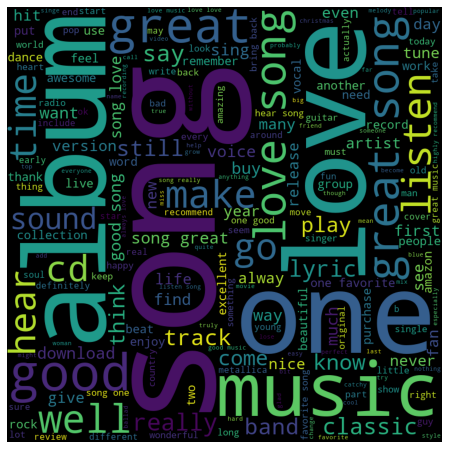

In [31]:
#Code take from GFG to generate Word Cloud

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in ptext:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

#Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
#Plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
 
plt.show()

________________